SEIS DT Diffusion Trend


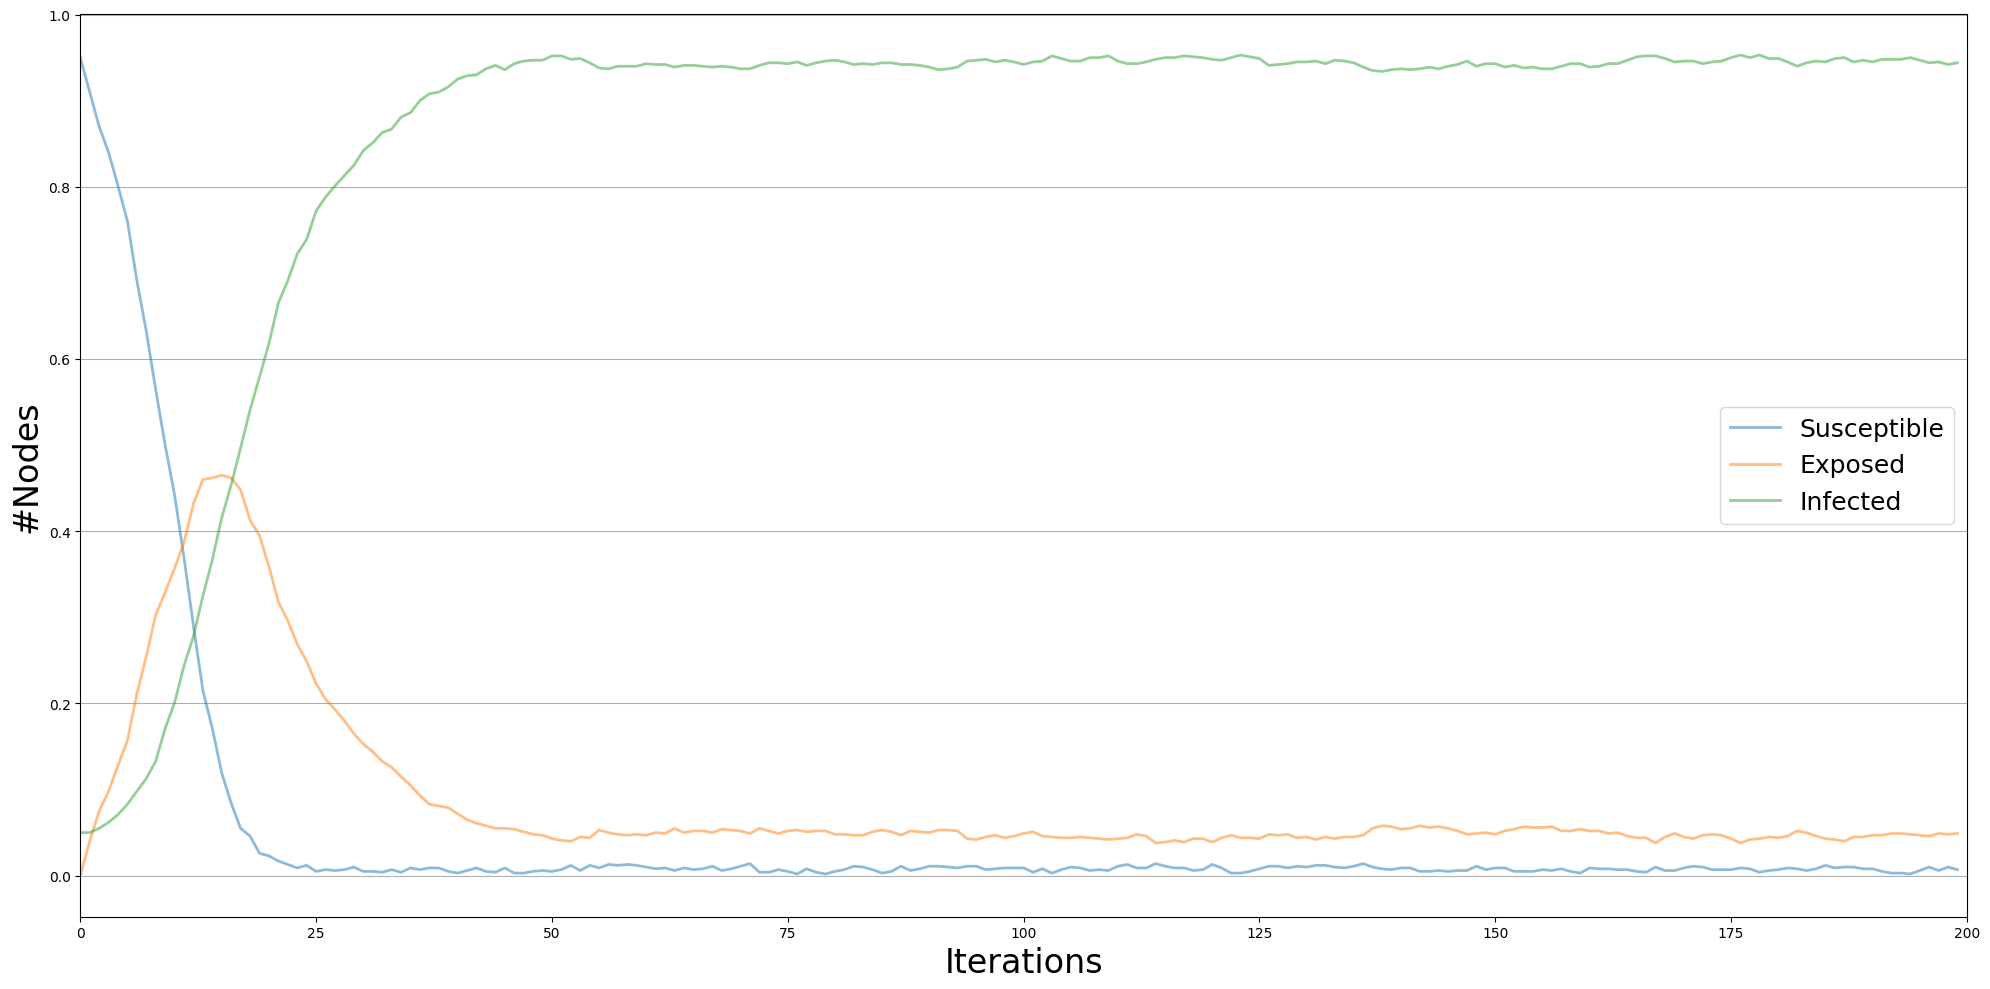

SEIS CT Diffusion Trend


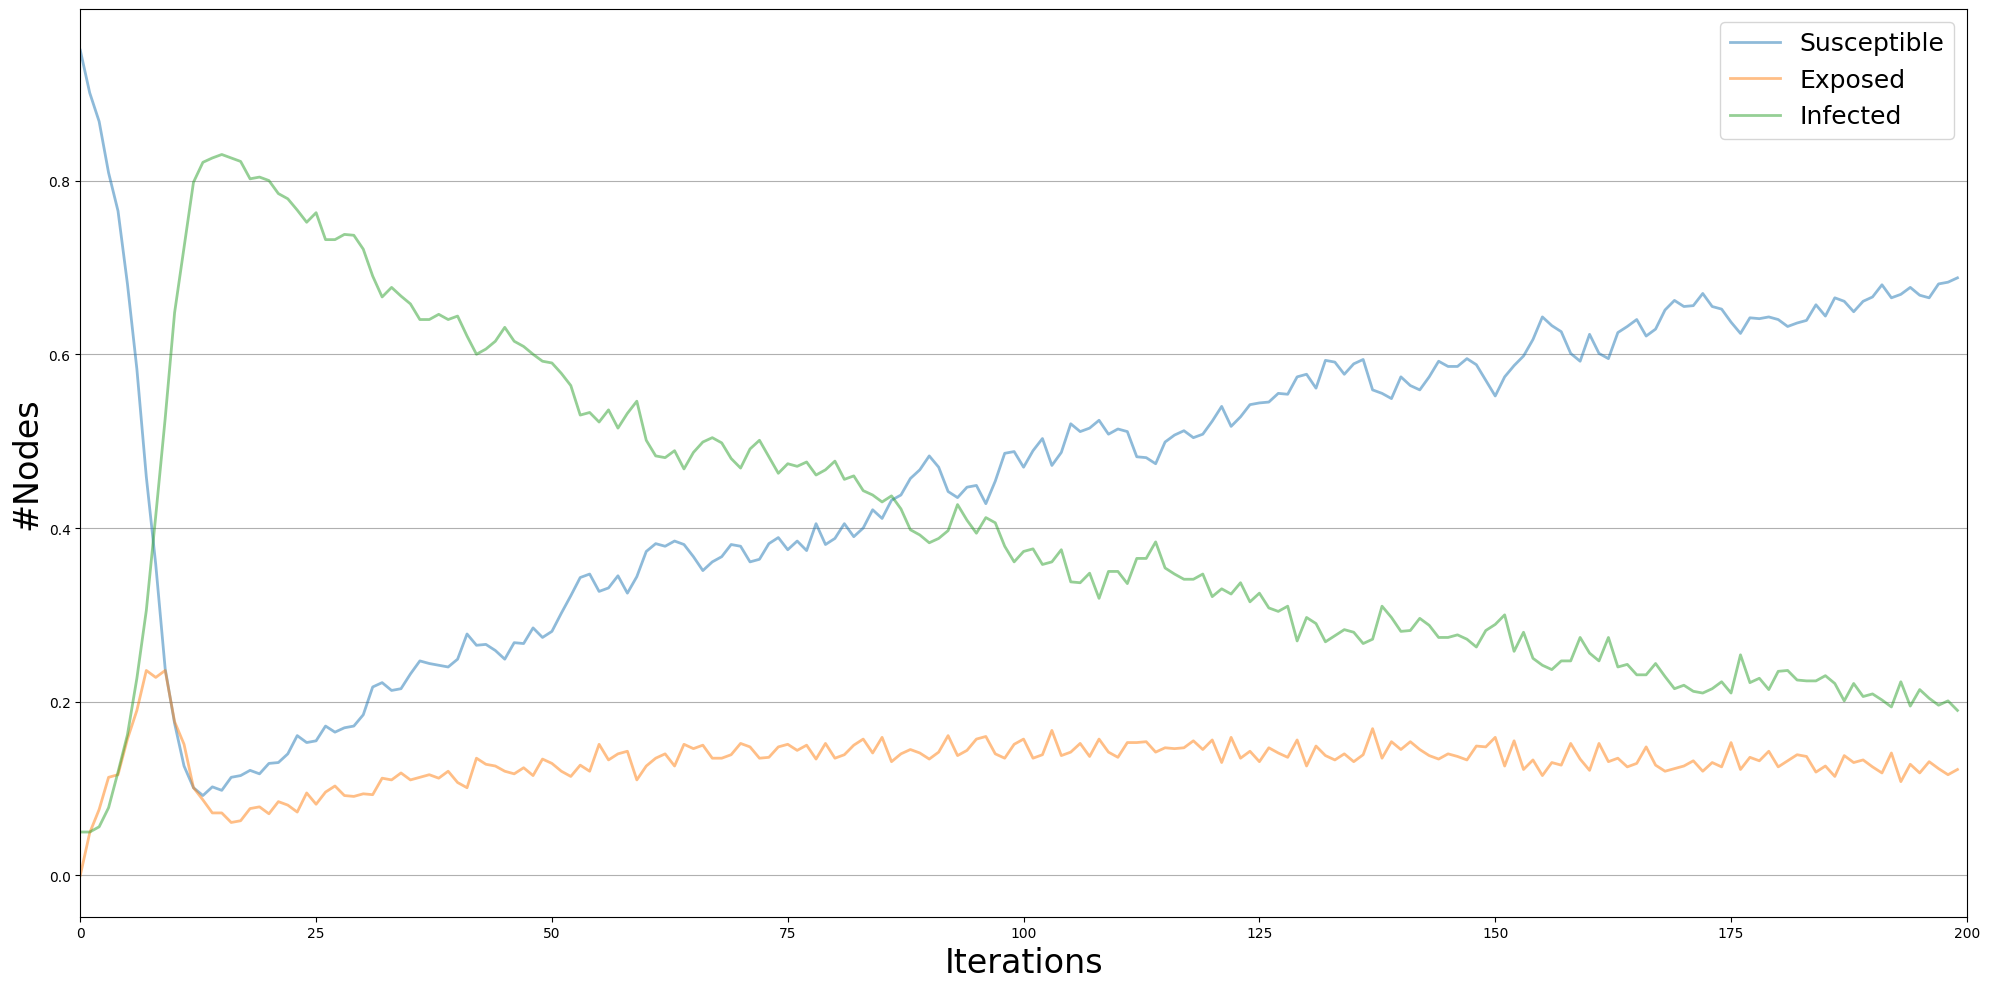

SEIS DT Diffusion Prevalence


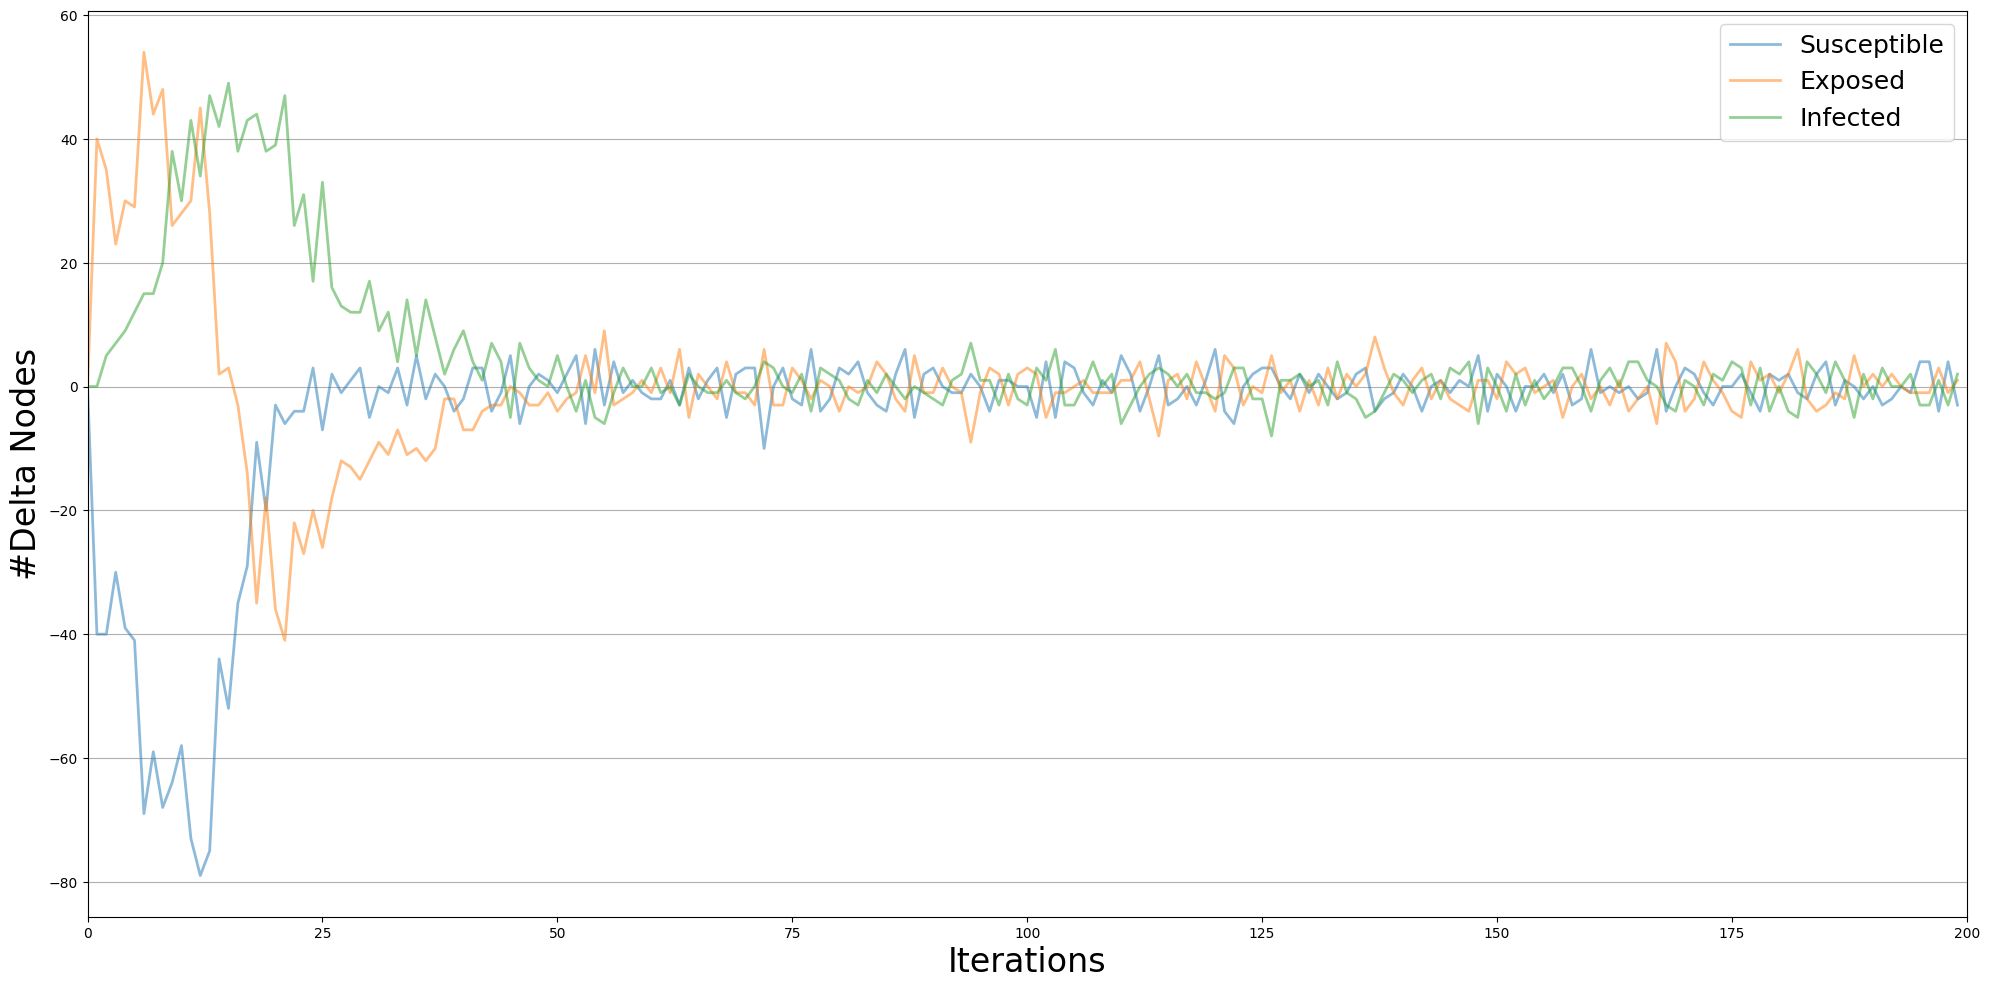

SEIS CT Diffusion Prevalence


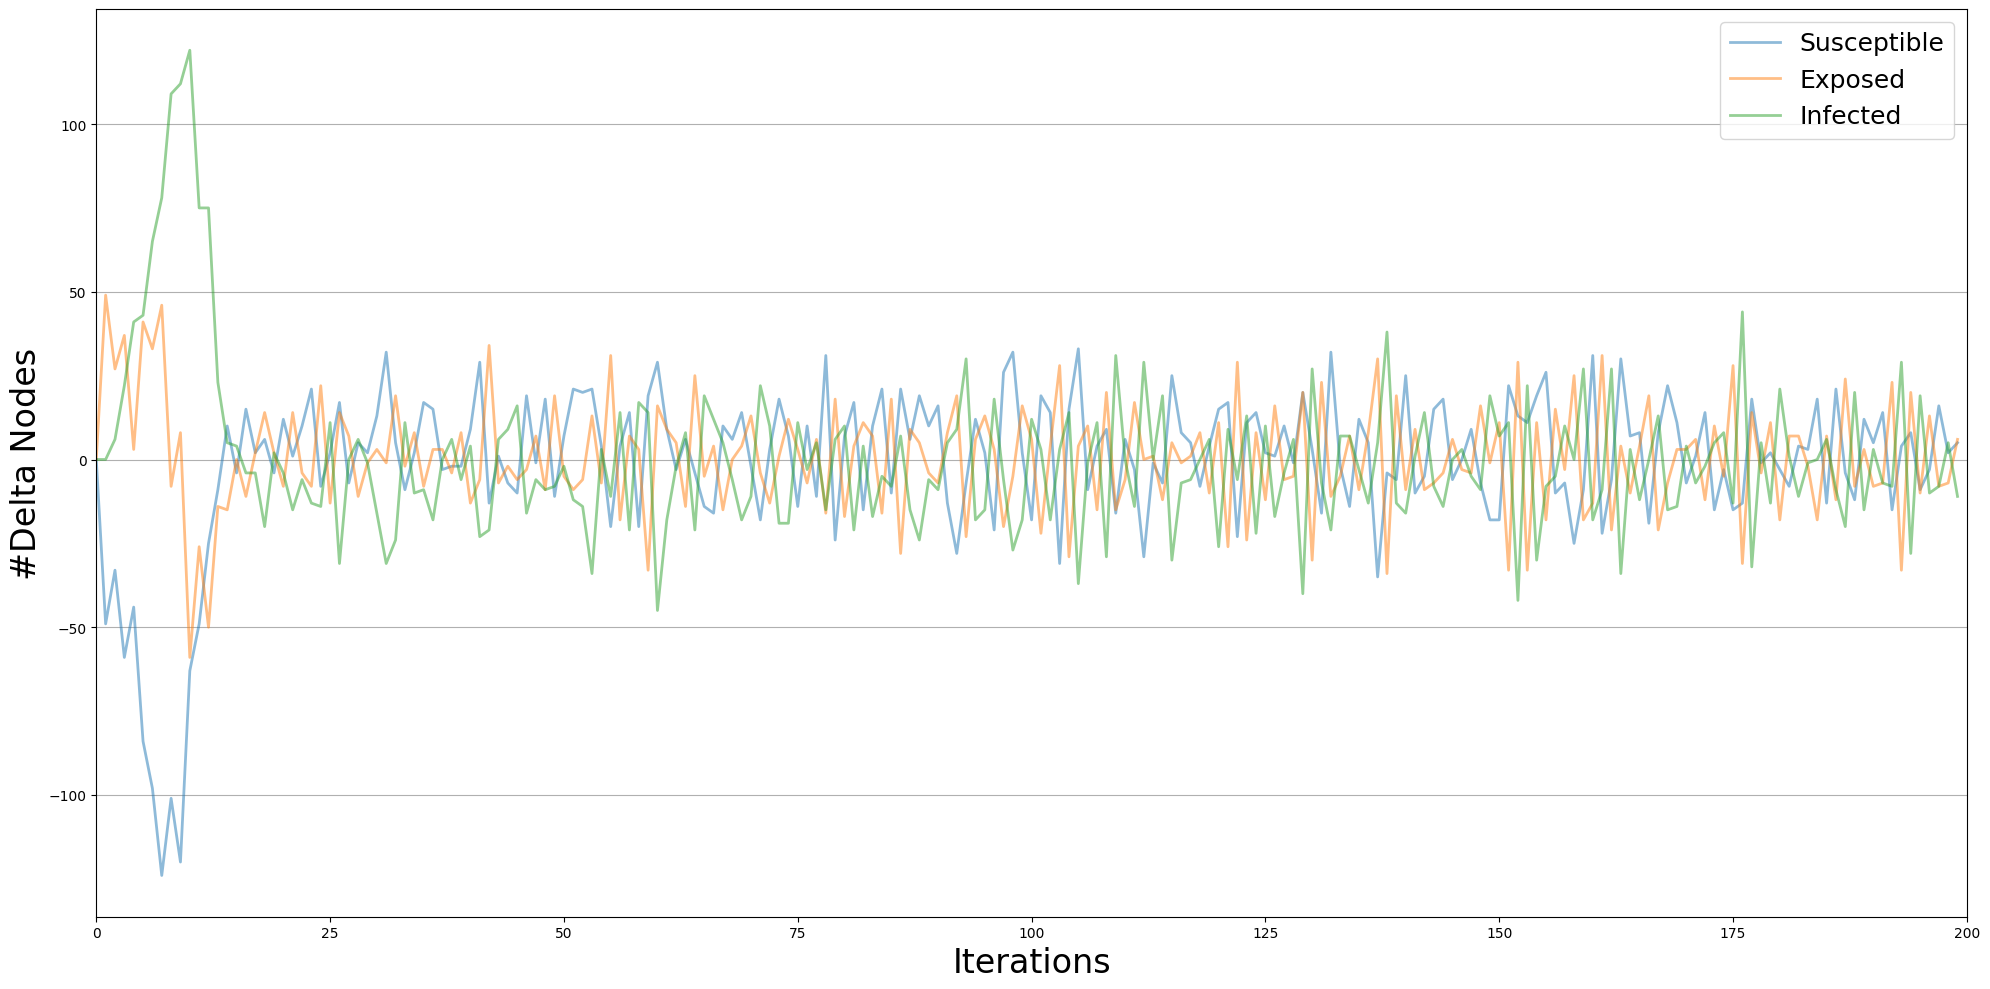

In [9]:
'''
SEIS assumes that if, during a generic iteration, a susceptible node comes into contact with an 
infected one, it becomes infected after an exposition period with probability beta, than it can 
switch back to susceptible with probability lambda (the only transition allowed are S→E→I→S).

DT - This implementation assumes discrete time dynamics for the E->I and I->S transitions.
CT - This implementation assumes continuous time dynamics for the E->I and I->S transitions.

Statuses/Codes
    S: Susceptible | 0
    E: Exposed     | 1
    I: Infected    | 2
    R: Recovered   | 3

Parameters:
    beta: Infection probability
    lambda: Recovery probability
    alpha: Incubation period

'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
seisDT_model = ep.SEISModel(g)
seisCT_model = ep.SEISctModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.01) # Infection rate 
config.add_model_parameter('lambda', 0.005) # Recovery rate
config.add_model_parameter('alpha', 0.1) # Incubation period
config.add_model_parameter("fraction_infected", 0.05) # Fraction of initially infected nodes
seisDT_model.set_initial_status(config)
seisCT_model.set_initial_status(config)

# Simulation
seisDT_iterations = seisDT_model.iteration_bunch(200)
seisDT_trends = seisDT_model.build_trends(seisDT_iterations)

seisCT_iterations = seisCT_model.iteration_bunch(200)
seisCT_trends = seisCT_model.build_trends(seisCT_iterations)

# Visualization

%matplotlib inline
print("SEIS DT Diffusion Trend")
viz = DiffusionTrend(seisDT_model, seisDT_trends)
viz.plot()
print("SEIS CT Diffusion Trend")
viz2 = DiffusionTrend(seisCT_model, seisCT_trends)
viz2.plot()

print("SEIS DT Diffusion Prevalence")
viz = DiffusionPrevalence(seisDT_model, seisDT_trends)
viz.plot()
print("SEIS CT Diffusion Prevalence")
viz = DiffusionPrevalence(seisCT_model, seisCT_trends)
viz.plot()
